NameError: name 'bm_size' is not defined

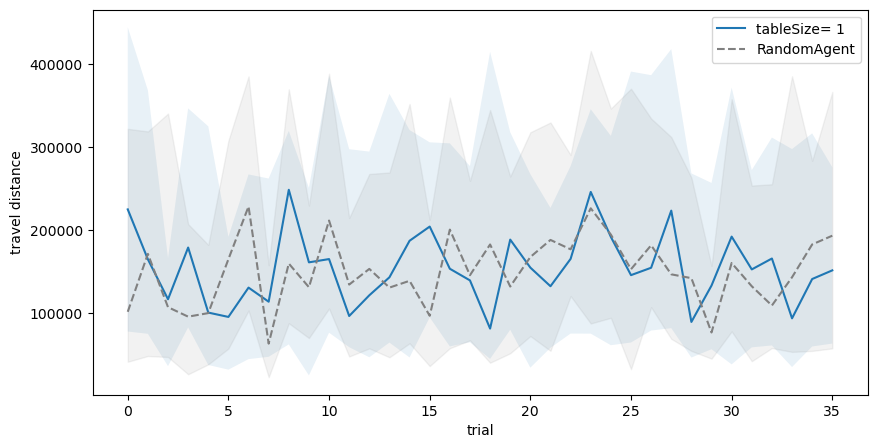

In [8]:
from pathlib import Path
import pickle
import re
from matplotlib import pyplot as plt
import numpy as np
import os

from analysis import Analysis
paths = [Path(r"C:\Users\bdr\Desktop\Projects\bm_simulation\results\travel_dist\pickle\BM20_SRAgent_no_habituation_n30_ne36_a0.1_g0.9_pe_greedy0.1_table_width_1_trajOFF.pickle")]
pathr = Path(r"C:\Users\bdr\Desktop\Projects\bm_simulation\results\travel_dist\pickle\BM20_RandomAgent_no_habituation_n30_ne36_a0.1_g0.9_pe_greedy0.1_table_width_1_trajOFF.pickle")

def plot(paths, path_random, suffix="", show_error=True, limit=None, savedir="results2/travel_dist/fig"):
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))
    for path in paths:
        with open(path, "rb") as f:
            tds = pickle.load(f)
        q1, q2, q3 = zip(*[np.percentile(between_agents, [25, 50, 75]) for between_agents in zip(*tds)])
        ax.plot(q2, label="tableSize= "+re.search(r'table_width_(\d+?)\D', path.name).group(1))
        if show_error:
            ax.fill_between(range(len(q2)), q1, q3, alpha=0.1)
    with open(path_random, "rb") as f:
        tds = pickle.load(f)
    q1, q2, q3 = zip(*[np.percentile(between_agents, [25, 50, 75]) for between_agents in zip(*tds)])
    ax.plot(q2, label=f"RandomAgent", c="gray", linestyle="--")
    if show_error:
        ax.fill_between(range(len(q2)), q1, q3, alpha=0.1, color="gray")

    ax.legend()
    ax.set_xlabel("trial")
    ax.set_ylabel("travel distance")
    ax.set_title(f"BM{bm_size}  {agent_type}")
    if limit is not None:
        ax.set_ylim(0, limit)
    plt.savefig(f"{savedir}/{agent_type}_10_30.png")

if __name__ == "__main__":
        savedir = ""
        plot(paths, pathr, suffix="", savedir=savedir, limit=None, show_error=True)
        